## Goal
- Identify the most frequent travel destinations.
- Analyze the development of passenger counts over the years.
- Determine the most used airline and region.
- Explore distribution of Low-fare flights.


### Questions to answer
1. Are there busy seasons?
2. Has passenger count been increased?
3. Most popular airline
4. Low cost vs non-low cost using population


Import libraries and data, created new date type columns for analysis. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\10_SFO_airtraffic\workingsheet.csv')

sns.set_style('ticks')

df['date']=pd.to_datetime(df['Activity Period Start Date']) # yyyy-mm data
df['month']=df['date'].dt.month # mm data
df['year']=df['date'].dt.year # yyyy data

#### 1. Are there busy season?


Calculated the total passenger count per month by grouping the DataFrame by `'month'`.

Text(0.5, 0, 'Month')

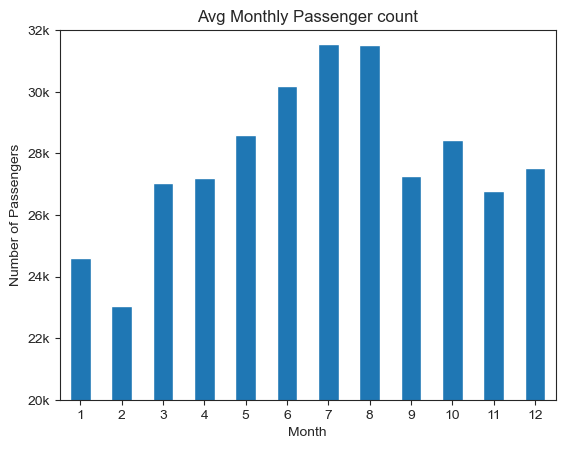

In [2]:
df.groupby('month')['Passenger Count'].mean().plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.gca().tick_params(axis='x', rotation=0)
plt.ylim(20000,32000)
plt.title('Avg Monthly Passenger count')
plt.ylabel('Number of Passengers')
plt.xlabel('Month')

- February has the lowest average passenger count as 23,000.
- July and August are the busiest months, as more than 31,000 passenger each.

#### 2. Has passenger count been increased?

Calculated the total monthly passenger count from 1999 to 2025. For better visualization, applied `rolling` function with 12 months rolling average.

In [3]:
df_monthly = df.groupby('date')['Passenger Count'].sum().rolling(window=12, min_periods=1).mean()

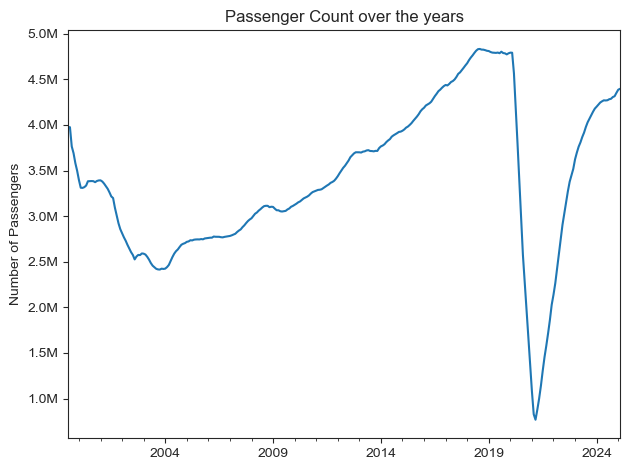

In [4]:

df_monthly.plot()
plt.title('Passenger Count over the years')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.1f}M'))
plt.ylabel('Number of Passengers')
plt.xlabel('')

plt.tight_layout()
plt.show()

Since 2004 passenger has been steadily increased, and after the pandemic number of passenger has quickly recovered.


#### 3. Most popular airline

Grouped the data by airline and calculated the total passenger count.
To show top 10 airlines, sorted value in descending order and limited to 10 rows, displayed using horizontal bar chart.

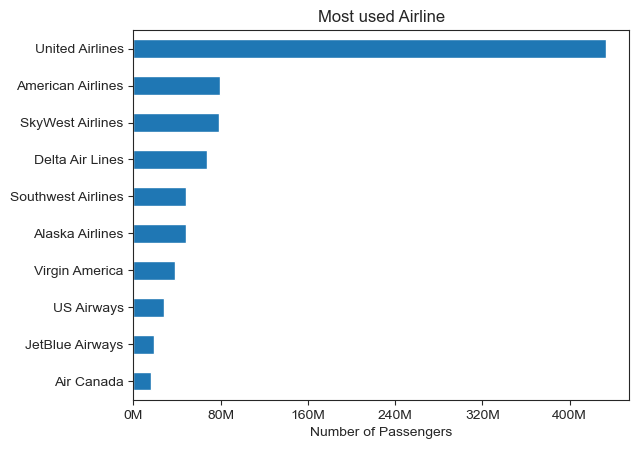

In [5]:
df.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(7))
plt.title('Most used Airline')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('Number of Passengers')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))

United Airlines is the most popular carrier at SFO, with over 400 million passengers.

#### 4. Low cost vs non-low cost airline distribution

Grouped Dataframe by price category and calculated total number of passenger.
Show distribution using a pie chart.

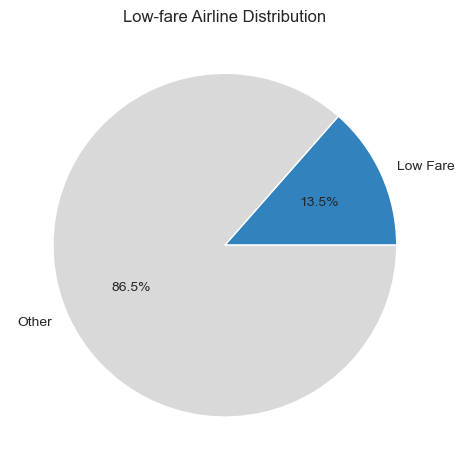

In [6]:
df.groupby('Price Category Code')['Passenger Count'].sum().plot(kind='pie',ylabel='',colormap='tab20c',
                                                                autopct='%1.1f%%', startangle=0)
plt.title('Low-fare Airline Distribution')
plt.tight_layout()
plt.show()